C:\Users\Talos\Programming\fractals\util.py:123: RuntimeWarning: invalid value encountered in remainder
  val %= 1
c:\python37\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


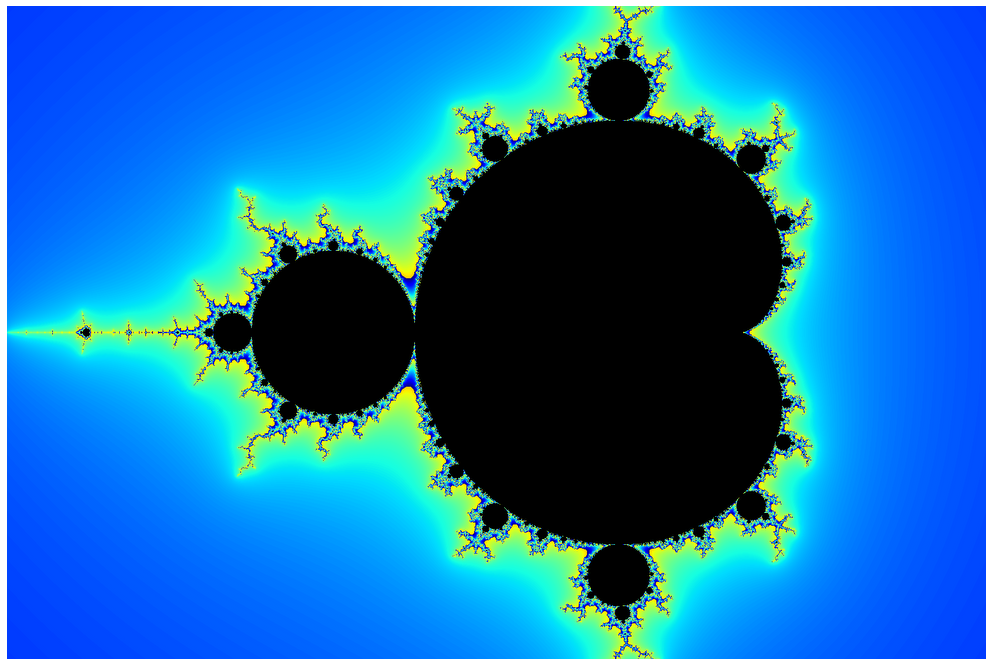

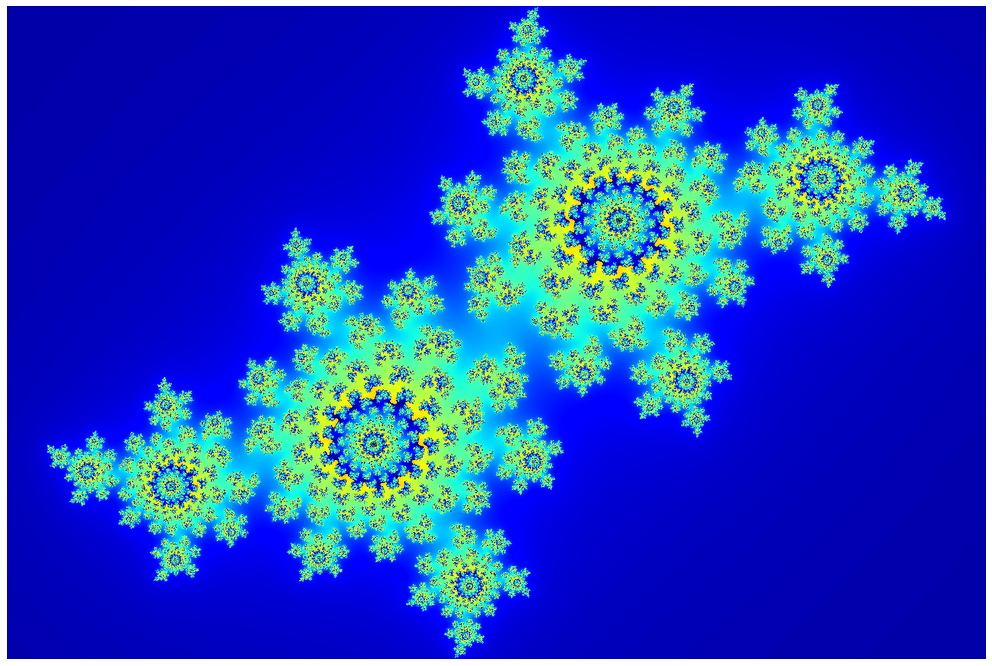

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import imageio
from tqdm import tqdm
from matplotlib.colors import Colormap
from IPython.display import display

from fractals import *
%matplotlib inline
%load_ext line_profiler

# for cmap in plt.colormaps()[len(plt.colormaps())//2:]:
#     print(cmap)
cmap = 'jet'

coords = create_set((-0.5, 0), 1, res=1024).astype(np.complex64)
val = mandelbrot_gpu(coords, maxiters=300, bailout=128).T
# %timeit val = mandelbrot_gpu(coords, maxiters=300, bailout=128).T
# print(val[500][750])
val = transform(val)
# val = colorize(val, colormap='mandelbrot')
val = cmap_colorize(val, cmap=cmap)
draw(val, 'mandelbrot')

coords = create_set((0, 0), 1, res=1024)
# print(coords.dtype)
val = julia_gpu(coords, -0.4 + 0.6j, maxiters=300, bailout=128).T
# print(val[np.isnan(val)])
val = transform(val, density=0.25)
val = cmap_colorize(val, cmap=cmap)
# val = colorize(val)
draw(val, 'julia')

In [ ]:
imageio.help()

In [1]:
from fractals import *
from multiprocessing import Pool
import datetime

coords = create_set((0, 0), 1, res=1024)
frames = 900
coords_list = [coords] * frames
a_vals = np.linspace(0, 2*np.pi, frames, endpoint=False)
images = []

writer = imageio.get_writer('media/julia.mp4', fps=60)

start = datetime.datetime.now()
images = (julia_frame((coords, a)) for a in a_vals)
for img in tqdm(images, total=frames):
    writer.append_data(img)
# for a in tqdm(a_vals):
#     images.append(julia_frame((coords, a)))
# with Pool() as pool:
#     images = list(tqdm(pool.imap(julia_frame, zip(coords_list, a_vals)), total=frames))
print(datetime.datetime.now() - start)

writer.close()
    
# imageio.mimsave('julia.gif', images, duration=0.04)

 11%|████▍                                    | 97/900 [00:30<06:16,  2.13it/s]C:\Users\Talos\Programming\fractals\util.py:123: RuntimeWarning: invalid value encountered in remainder
  val %= 1
c:\python37\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
100%|████████████████████████████████████████| 900/900 [07:29<00:00,  3.55it/s]


0:07:29.500154
